# Игры — Формирование модели монетизации

## 1. Оглавление:<a id="step1"></a>

[1. Оглавление](#step1)

[2. Постановка задачи](#step2)

[3. Описание датасетов](#step3)

[4. Загрузка данных](#step4)

[5. Предобработка данных](#step5)

[6. Анализ влияния событий на совершение целевого события](#step6)

    6.1. Анализ количества событий
    6.2. Анализ количества построек
    
[7. Продукт](#step7)

    7.1 DAU (Количество уникальных пользоватейлей в день)
    7.2 WAU (Количество уникальных пользоватейлей в неделю)
    7.3 Sticky factor (степень лояльности и вовлеченности аудитории)
    7.4 Количество событий в день
    7.5 Retention rate
    7.6 Среднее время прохождения игры
    7.7 Стратегии игры
    7.8 Retention Rate по стратегиям
    7.9 Среднее время прохождения уровня по стратегиям
    
[8. Маркетинг](#step8)

    8.1 Распределение затрат
    8.2 CAC. Стоимость привлечения одного покупателя
    8.3 CAC c разбивкой по источникам.
    
[9. Формулировка и проверка статистических гипотез](#step9)

    9.1 Гипотеза №1
    9.2 Гипотеза №2
    
[10. Общий вывод](#step10)

[11. Рекомендации](#step11)

## 2. Задача:<a id="step2"></a>

Сформируйте модель монетизации игрового приложения.

## 3. Описание датасетов:<a id="step3"></a>

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.


## 4. Загрузка данных<a id="step4"></a>

In [1]:
#установим последнюю версию библиотеки сиборн
!pip install seaborn -U

Requirement already up-to-date: seaborn in c:\users\ko66k\.conda\envs\practicum\lib\site-packages (0.11.1)


In [2]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from scipy import stats as st

In [3]:
#загрузим датасет game_actions.csv и сохраним его как ga
ga = pd.read_csv(filename)

ga

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [4]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


In [5]:
ga.shape

(135640, 5)

In [6]:
ga.describe()

,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-10 03:08:18,building,spaceport,ff841992-d93b-462e-bc6e-18c24a514f36,satellite_orbital_assembly
freq,4,127957,59325,22,1866


In [7]:
#проверим дубликаты
ga.duplicated().sum()

1

In [8]:
#загрузим данные со стоимостью рекламы
ad_cost = pd.read_csv(filename1)

ad_cost

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796
5,facebook_ads,2020-05-08,68.009276
6,facebook_ads,2020-05-09,38.723350
7,instagram_new_adverts,2020-05-03,943.204717
8,instagram_new_adverts,2020-05-04,502.925451
9,instagram_new_adverts,2020-05-05,313.970984


In [9]:
ad_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


In [10]:
ad_cost.describe()

,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


In [11]:
# Загрузим датасет с данными, откуда пришли пользователи
sources = pd.read_csv(filename2)

sources

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads
...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,instagram_new_adverts
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,facebook_ads
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,yandex_direct
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,instagram_new_adverts


In [12]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


In [13]:
#проверим на наличие дубликатов
sources.duplicated().sum()

0

***

1. Датасет `game_actions`:

    - размер (135640 строк, 5 столбца)
    - неправильный тип у столбца с датами
    - есть 1 дубликат
    - есть пропуски в столбцах building_type, project_type. Пропуски не похожи на случайные


2. Датасет `ad_cost`:

    - размер (28 строк, 3 столбца)
    - неправильный тип у столбца с датами
    - дубликатов нет
    - столбец cost стоит округлить до двух знаков после запятой     
    - 4  уникальных источника рекламы


3. Датасет `sources`:

    - размер (13576 строк, 2 столбца)
    - дубликатов нет
    - пропусков нет


## 5. Предобработка данных<a id="step5"></a>

### game_actions

In [14]:
ga

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [15]:
# приведем столбец с датами к datetime
ga['event_datetime'] = pd.to_datetime(ga['event_datetime'])

In [16]:
#удалим дубликаты строк
ga = ga.drop_duplicates().reset_index(drop=True)

In [17]:
ga.shape

(135639, 5)

In [18]:
ga['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [19]:
ga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135639 entries, 0 to 135638
Data columns (total 5 columns):
event_datetime    135639 non-null datetime64[ns]
event             135639 non-null object
building_type     127956 non-null object
user_id           135639 non-null object
project_type      1866 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 5.2+ MB


In [20]:
ga.groupby('event')['user_id'].count().reset_index()

,event,user_id
0,building,127956
1,finished_stage_1,5817
2,project,1866


In [21]:
ga['project_type'].value_counts().reset_index()

,index,project_type
0,satellite_orbital_assembly,1866


В столбце `building_type` мы видим только 127956 строк, ровно столько сколько событий building у нас есть в столбце `event`, 
ситуация со столбцом `project_type` аналогична, в него вынесено событие `project` и указан его тип `satellite_orbital_assembly` разработка орбитальной сборки спутников. Оставим пропуски как есть, не заполняя.

In [22]:
ga['event_datetime'].describe()

count                  135639
unique                 128790
top       2020-05-09 12:35:56
freq                        4
first     2020-05-04 00:00:01
last      2020-06-05 12:32:49
Name: event_datetime, dtype: object

### ad_cost

In [23]:
#приведем столбец с датами к типу datetime
ad_cost['day'] = pd.to_datetime(ad_cost['day'])

In [24]:
#округлим столбец cost до двух знаков
ad_cost['cost'] = ad_cost['cost'].round(2)

In [25]:
ad_cost['day'].describe()

count                      28
unique                      7
top       2020-05-08 00:00:00
freq                        4
first     2020-05-03 00:00:00
last      2020-05-09 00:00:00
Name: day, dtype: object

***

`game_actions`
- столбец `event_datetime` приведен к типу datetime
- дубликаты удалены
- В столбце `building_type` мы видим только 127956 строк, ровно столько сколько событий building у нас есть в столбце `event`, ситуация со столбцом `project_type` аналогична, в него вынесено событие `project` и указан его тип `satellite_orbital_assembly` разработка орбитальной сборки спутников. Оставили пропуски как есть, не заполняя.
- данные за период с 4 мая по 5 июня 2020 года

`ad_cost`
- столбец `day` приведен к типу datetime
- столбец `cost` округлен до двух знаков
- данные по стоимостям кликов за период с 3 мая по 9 мая, то есть стоимость привлечения нашей когорты

## 6. Анализ влияния событий на совершение целевого события<a id="step6"></a>

Целевое событие - завершение первого уровня  `ga['event'] == 'finished_stage_1'`

### 6.1. Анализ количества событий

In [26]:
# Количество уникальных пользователей в нашей когорте
ga['user_id'].nunique()

13576

In [27]:
#Посмотрим на распределение количества событий
ga_event = ga.groupby('event').agg({'user_id': ['count','nunique']}).reset_index()
ga_event.columns = ['event', 'n_event', 'n_users']
ga_event

,event,n_event,n_users
0,building,127956,13576
1,finished_stage_1,5817,5817
2,project,1866,1866


In [28]:
ga_event['ratio']= ga_event['n_event']/ga_event['n_users']
ga_event

,event,n_event,n_users,ratio
0,building,127956,13576,9.425162
1,finished_stage_1,5817,5817,1.000000
2,project,1866,1866,1.000000


In [29]:
# установим палетту для библиотекаи сиборн
sns.set_palette('muted') 

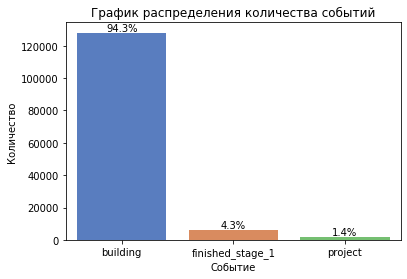

In [30]:
plt.figure()

ax = sns.barplot(x="event", y="n_event", data=ga_event)
ax.set_xticklabels(ax.get_xticklabels())

total = len(ga)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

ax.set_title('График распределения количества событий')
ax.set_xlabel('Событие')
ax.set_ylabel('Количество');

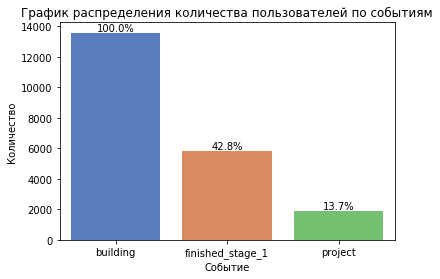

In [31]:
ax = sns.barplot(x="event", y="n_users", data=ga_event)
ax.set_xticklabels(ax.get_xticklabels())

total = ga['user_id'].nunique()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

ax.set_title('График распределения количества пользователей по событиям')
ax.set_xlabel('Событие')
ax.set_ylabel('Количество');

In [32]:
ga_event['n_users'].sum()

21259

Согласно графику и расчетам всего у нас 135639 событий, из них
- 94.3% - постройка зданий
- 4.3 % - завершение 1-го уровня
- 1.4% - выполнение проекта

Всего в игре из первой когорты 13576 уникальных пользоватей, которые совершают эти события, из них:
- 100% строят постройки
- 42.8% завершили 1-й уровень
- 13.7% выполнили проект

### 6.2. Анализ количества построек

In [33]:
ga_building = ga.groupby('building_type').agg({'user_id': ['count','nunique']})
ga_building.columns = ['n_building', 'n_users']
ga_building = ga_building.sort_values('n_users', ascending=False)
ga_building['n_users_pct'] = ga_building['n_users'] / ga['user_id'].nunique()*100
ga_building

,n_building,n_users,n_users_pct
building_type,,,
assembly_shop,54494,13576,100.000000
spaceport,59325,13231,97.458751
research_center,14137,7671,56.504125


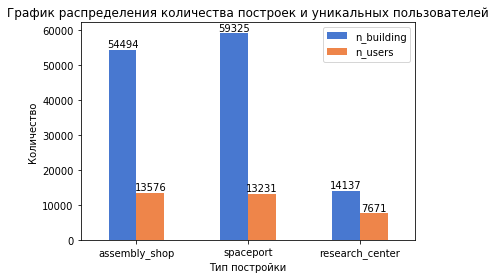

In [34]:
ax = ga_building.drop('n_users_pct', axis=1).plot.bar(rot=0)

for p in ax.patches:
    percentage = '{:.0f}'.format(p.get_height())
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
    
ax.set_title('График распределения количества построек и уникальных пользователей')
ax.set_xlabel('Тип постройки')
ax.set_ylabel('Количество');

In [35]:
ga_building = ga.groupby('building_type').agg({'user_id': ['count','nunique']}).reset_index()
ga_building.columns = ['building_type', 'n_building', 'n_users']
ga_building

,building_type,n_building,n_users
0,assembly_shop,54494,13576
1,research_center,14137,7671
2,spaceport,59325,13231


In [36]:
ga['building_type'].count()

127956

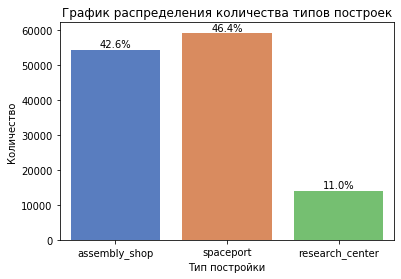

In [37]:
ax = sns.countplot(data = ga, x='building_type')

total = ga['building_type'].count()

for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

ax.set_title('График распределения количества типов построек')
ax.set_xlabel('Тип постройки')
ax.set_ylabel('Количество');

Всего у нас есть 127956 построек, из которых:
- 42.6% (54494 постройки) -`assembly_shop` — сборочный цех, и его построили 100% наших пользователей
- 46.4% (59325 построек)- `spaceport` — космопорт, и его построили 98% пользователей
- 11% (14137 построек)- `research_center` — исследовательский центр, построено 56% пользователей

В среднем на одного уникального пользователя приходится по 9.5 построек, но завершить проект или пройти первый уровень, игрок может только 1 раз.

## 7. Продукт<a id="step7"></a>

### 7.1 DAU (Количество уникальных пользоватейлей в день)¶
Посчитаем среднее DAU за наш период:

In [38]:
ga['date'] = ga['event_datetime'].dt.date

In [39]:
# Посчитаем средний DAU
dau_mean = ga.groupby('date').agg({'user_id': 'nunique'}).mean()
int(dau_mean)

2884

In [40]:
# Посчитаем DAU по дням
dau = ga.groupby('date').agg({'user_id': 'nunique'}).reset_index()
dau

,date,user_id
0,2020-05-04,5860
1,2020-05-05,6382
2,2020-05-06,6854
3,2020-05-07,7384
4,2020-05-08,7891
5,2020-05-09,8394
6,2020-05-10,9219
7,2020-05-11,5995
8,2020-05-12,5776
9,2020-05-13,5632


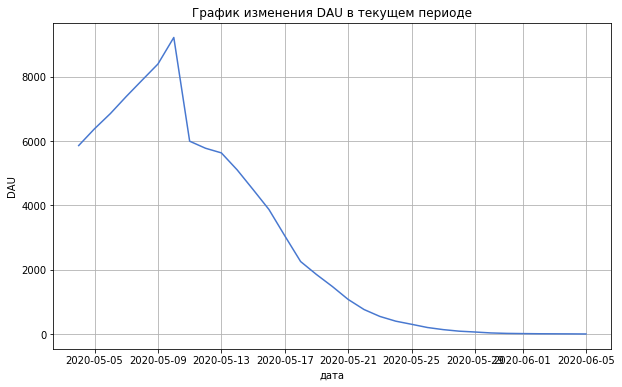

In [41]:
# построим график изменения DAU в течение нашел периода
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=dau, x = 'date', y = 'user_id')
ax.grid()
plt.title('График изменения DAU в текущем периоде')
plt.xlabel('дата')
plt.ylabel('DAU');

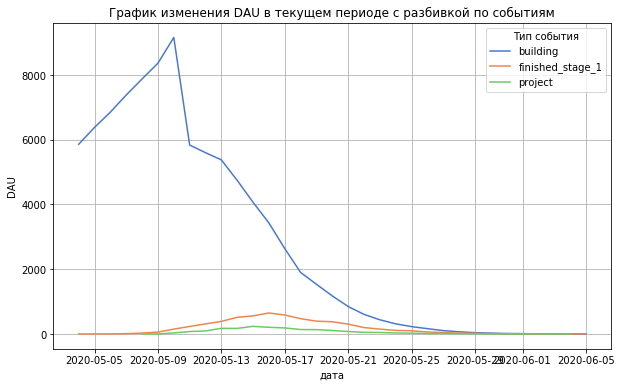

In [42]:
# построим график изменения DAU в течение нашел периода c разбивкой по событиям
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=ga.groupby(['event', 'date']).agg(
    {'user_id': 'nunique'}).reset_index(), x = 'date', y = 'user_id', hue = 'event')
ax.grid()
plt.title('График изменения DAU в текущем периоде с разбивкой по событиям')
plt.xlabel('дата')
plt.ylabel('DAU')
plt.legend(title='Тип события');

**DAU** В среднем в игру играют 2884 пользователей в день. Наибольшая активность 4-10 мая, после 25 активность правктически сводится к нулю.

Пик активности 10 мая (9219 уникальных пользователей), после этого показатели начинают падать. Это совпадает с датами проведения маркетинговой компании 3-9 мая.

**DAU пользователей по совершенным событиям.** можно отметить что до 15 мая показатели по завершенным уровням растут, после начинают падать. То есть в среднем на завершение уровня у пользователя уходит 10-14 дней

### 7.2 WAU (Количество уникальных пользоватейлей в неделю)
Посчитаем среднее WAU за наш период:

In [43]:
ga['week'] = ga['event_datetime'].dt.week

In [44]:
# Посчитаем средний WAU
wau_mean = ga.groupby('week').agg({'user_id': 'nunique'}).mean()
int(wau_mean)

6120

In [45]:
ga['begin_of_week'] = pd.to_datetime(
    ga['event_datetime'], unit='d') - pd.to_timedelta(ga['event_datetime'].dt.dayofweek, unit='d')
ga['begin_of_week'] = ga['begin_of_week'].dt.date

In [46]:
# посчитаем WAU по неделям
wau = ga.groupby('begin_of_week').agg({'user_id': 'nunique'}).reset_index()
wau

,begin_of_week,user_id
0,2020-05-04,13576
1,2020-05-11,12121
2,2020-05-18,4353
3,2020-05-25,521
4,2020-06-01,29


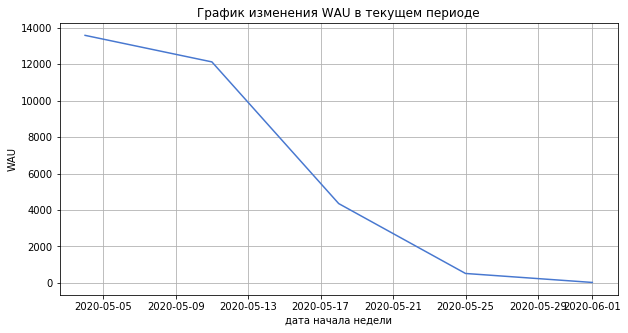

In [47]:
# построим график изменения WAU
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=wau, x = 'begin_of_week', y = 'user_id')
ax.grid()
plt.title('График изменения WAU в текущем периоде')
plt.xlabel('дата начала недели')
plt.ylabel('WAU'); 

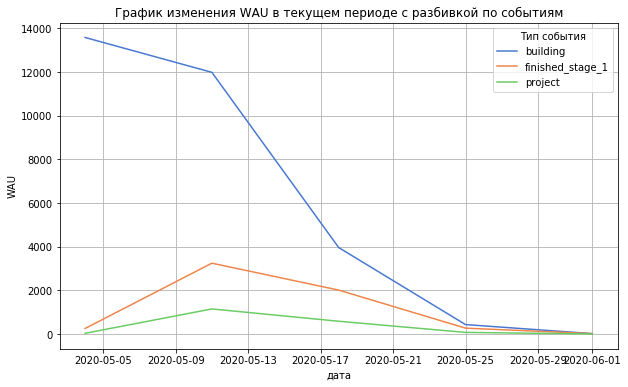

In [48]:
# построим график изменения WAU в течение нашего периода c разбивкой по событиям
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=ga.groupby(['event', 'begin_of_week']).agg(
    {'user_id': 'nunique'}).reset_index(), x = 'begin_of_week', y = 'user_id', hue = 'event')
ax.grid()
plt.title('График изменения WAU в текущем периоде с разбивкой по событиям')
plt.xlabel('дата')
plt.ylabel('WAU')
plt.legend(title='Тип события');

**WAU** Средний WAU 6120 пользователей в неделю. Причем мы видим высокие показатели первые две недели и потом резкий обвал после окончания рекламной компании по привлечению людей. К концу месяца пользователей из нашей когорты практически не осталось.

**WAU пользователей по совершенным событиям.** Первые 10 дней рост по заврешению уровня и проекту, потом уменьшение. к 25 мая практически все пользователи или завршили уровень или покинули игру.

### 7.3 Sticky factor (степень лояльности и вовлеченности аудитории)


In [49]:
sticky_factor_wau = dau_mean/wau_mean
sticky_factor_wau

user_id    0.471385
dtype: float64

47% всех посетителей из нашей когорты остаются лояльны к сервису целую неделю.

### 7.4 Количество событий в день

In [50]:
event_per_user = ga.groupby('date').agg({'user_id': ['count','nunique']})
event_per_user.columns = ['n_event', 'n_users']
event_per_user

,n_event,n_users
date,,
2020-05-04,8171,5860
2020-05-05,9055,6382
2020-05-06,9925,6854
2020-05-07,10858,7384
2020-05-08,12059,7891
2020-05-09,13129,8394
2020-05-10,15207,9219
2020-05-11,8185,5995
2020-05-12,7918,5776


In [51]:
event_per_user['event_per_user'] = event_per_user['n_event'] / event_per_user['n_users']
event_per_user['event_per_user'].mean()

1.3334837067723853

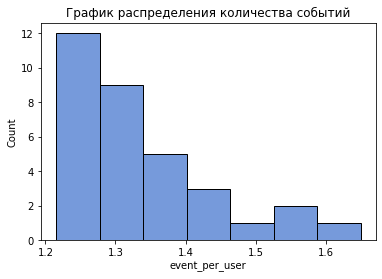

In [52]:
# Построим гистограмму распределений событий на пользователя в день
sns.histplot(event_per_user, x="event_per_user")
plt.title('График распределения количества событий');

В среднем один пользователь совершаает 1.3 события в день. То есть, чтобы пройти первый уровень пользователю требудется примерно 13-18 событий.

### 7.5 Retention rate

Для расчета Retention rate в нашей когорте, разделим число пользователей в каждую недель на число пользователей в коготе.

In [53]:
retention = ga.groupby('week')['user_id'].nunique().reset_index()
retention.columns = ['week', 'n_users']
retention['retention'] = retention['n_users'] / ga['user_id'].nunique()

In [54]:
retention

,week,n_users,retention
0,19,13576,1.000000
1,20,12121,0.892826
2,21,4353,0.320639
3,22,521,0.038377
4,23,29,0.002136


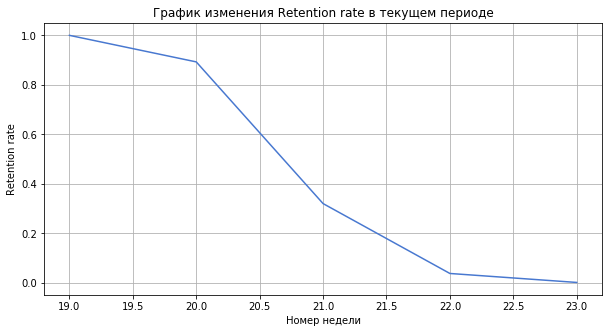

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=retention, x = 'week', y = 'retention')
ax.grid()
plt.title('График изменения Retention rate в текущем периоде')
plt.xlabel('Номер недели')
plt.ylabel('Retention rate'); 

По графику видно, что:
1. после двух недель игры, в когорте остается меньше 32% пользователей
2. к четвертой неделе остается меньше 4% игроков

Это может быть потому, что в первые две недели большее количество игроков завершает первый уровень. Оставшаяся часть или теряет интерес, или неспешно завершает уровень.

### 7.6 Среднее время прохождения игры

Для нахождения времени прохождения игры, найдем время 1го входа в игру у пользователей:

In [56]:
# Найдем дату первого входа в игру и отобразим в датасете
first_visit_date_by_customers = ga.groupby('user_id')['date'].min().reset_index()
first_visit_date_by_customers.columns = ['user_id', 'first_visit_date']
ga = ga.merge(first_visit_date_by_customers, on='user_id')
ga


,event_datetime,event,building_type,user_id,project_type,date,week,begin_of_week,first_visit_date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,19,2020-05-04,2020-05-04
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,2020-05-04,2020-05-04
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,2020-05-04,2020-05-04
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,2020-05-04,2020-05-04
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,19,2020-05-04,2020-05-04
...,...,...,...,...,...,...,...,...,...
135634,2020-05-13 23:56:39,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,2020-05-13,20,2020-05-11,2020-05-10
135635,2020-05-18 00:23:28,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,2020-05-18,21,2020-05-18,2020-05-10
135636,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,2020-05-10,19,2020-05-04,2020-05-10
135637,2020-05-13 08:11:19,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,2020-05-13,20,2020-05-11,2020-05-10


In [57]:
# Плсчитаем время прохождения игры для каждого пользователя
ga['progress_time'] = ga['date'] - ga['first_visit_date']
ga

,event_datetime,event,building_type,user_id,project_type,date,week,begin_of_week,first_visit_date,progress_time
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,19,2020-05-04,2020-05-04,0 days
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,2020-05-04,2020-05-04,1 days
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,2020-05-04,2020-05-04,1 days
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,2020-05-04,2020-05-04,1 days
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,19,2020-05-04,2020-05-04,2 days
...,...,...,...,...,...,...,...,...,...,...
135634,2020-05-13 23:56:39,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,2020-05-13,20,2020-05-11,2020-05-10,3 days
135635,2020-05-18 00:23:28,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,2020-05-18,21,2020-05-18,2020-05-10,8 days
135636,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,2020-05-10,19,2020-05-04,2020-05-10,0 days
135637,2020-05-13 08:11:19,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,2020-05-13,20,2020-05-11,2020-05-10,3 days


In [58]:
# создадим срез по игрокам, прошедшим первый уровень
ga_winners = ga.query('event == "finished_stage_1"')

In [59]:
# приведем timedelta к целочисленному формату данных
ga_winners['progress_time'] = pd.to_numeric(ga_winners['progress_time'].dt.days, downcast='integer')

C:\Users\ko66k\.conda\envs\practicum\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


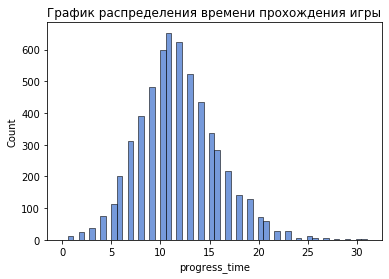

In [60]:
# Построим гистограмму распределений сессий на пользователя в день
sns.histplot(ga_winners, x="progress_time")
plt.title('График распределения времени прохождения игры');

In [61]:
ga_winners['progress_time'].describe()

count    5817.000000
mean       11.808492
std         4.076062
min         0.000000
25%         9.000000
50%        12.000000
75%        14.000000
max        31.000000
Name: progress_time, dtype: float64

Среднее время прохождения игры 12 дней, основная масса пользователей проходит игру от 9 до 14 дней.

### 7.7 Стратегии игры

В игре есть две возможности для прохождения уровня:

1. Победа над первым врагом
2. Реализация проекта - разработка орбитальной сборки спутников


Промаркируем наших пользователей в зависимости от стратегии:
 1. warrior
 2. builder

In [62]:
ga_project = ga.query('event =="finished_stage_1" or event =="project"')

In [63]:
ga['event'].value_counts()

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [64]:
ga_project

,event_datetime,event,building_type,user_id,project_type,date,week,begin_of_week,first_visit_date,progress_time
17,2020-05-13 06:53:03,project,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,satellite_orbital_assembly,2020-05-13,20,2020-05-11,2020-05-04,9 days
19,2020-05-15 05:29:13,finished_stage_1,NaN,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-15,20,2020-05-11,2020-05-04,11 days
32,2020-05-16 11:51:58,finished_stage_1,NaN,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-16,20,2020-05-11,2020-05-04,12 days
49,2020-05-11 14:18:05,finished_stage_1,NaN,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-11,20,2020-05-11,2020-05-04,7 days
73,2020-05-16 13:08:11,finished_stage_1,NaN,4fe0f101-694b-4e31-9740-d1d87f7208ea,NaN,2020-05-16,20,2020-05-11,2020-05-04,12 days
...,...,...,...,...,...,...,...,...,...,...
135534,2020-05-27 07:48:56,finished_stage_1,NaN,825e727b-7847-4c5f-a26c-3ee0f18d8177,NaN,2020-05-27,22,2020-05-25,2020-05-10,17 days
135586,2020-06-01 18:23:39,project,NaN,637a8d39-3872-4549-80cc-bebee6c88056,satellite_orbital_assembly,2020-06-01,23,2020-06-01,2020-05-10,22 days
135587,2020-06-02 00:26:56,finished_stage_1,NaN,637a8d39-3872-4549-80cc-bebee6c88056,NaN,2020-06-02,23,2020-06-01,2020-05-10,23 days
135609,2020-05-26 15:15:19,finished_stage_1,NaN,0d37a895-ee0f-4e36-aadb-880cef670f0b,NaN,2020-05-26,22,2020-05-25,2020-05-10,16 days


In [65]:
strategy_dict = ga_project.groupby('user_id')['event'].count().reset_index()
strategy_dict.columns = ['user_id', 'n_event']
strategy_dict

,user_id,n_event
0,001d39dc-366c-4021-9604-6a3b9ff01e25,1
1,003ee7e8-6356-4286-a715-62f22a18d2a1,1
2,004074f8-251a-4776-922c-8348dca1a2f6,1
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,1
4,0056c007-c082-43cc-bdef-afc49bca4cb9,1
...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,1
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,1
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,1
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,1


In [66]:
# создадим функцию, определяющую стратегию игроков, в зависимости от количества событий у уникального пользователя
def set_strategy(row):
    if row["n_event"] == 2:
        return "builder"
    else:
        return "warrior"

In [67]:
#применим функцию `set_strategy` и получим стратегический словарь из id пользователя и его стратегии
strategy_dict = strategy_dict.assign(strategy=strategy_dict.apply(set_strategy, axis=1))
strategy_dict

,user_id,n_event,strategy
0,001d39dc-366c-4021-9604-6a3b9ff01e25,1,warrior
1,003ee7e8-6356-4286-a715-62f22a18d2a1,1,warrior
2,004074f8-251a-4776-922c-8348dca1a2f6,1,warrior
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,1,warrior
4,0056c007-c082-43cc-bdef-afc49bca4cb9,1,warrior
...,...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,1,warrior
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,1,warrior
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,1,warrior
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,1,warrior


In [68]:
#соединим два датасета ga cо стратегическим словарем, и получим срез по выигравшим игрокам, с историей их действий
ga_strategy = ga.merge(strategy_dict.drop('n_event', axis=1), on='user_id')
ga_strategy

,event_datetime,event,building_type,user_id,project_type,date,week,begin_of_week,first_visit_date,progress_time,strategy
0,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,19,2020-05-04,2020-05-04,0 days,builder
1,2020-05-06 23:49:25,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-06,19,2020-05-04,2020-05-04,2 days,builder
2,2020-05-07 03:56:30,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-07,19,2020-05-04,2020-05-04,3 days,builder
3,2020-05-07 07:58:20,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-07,19,2020-05-04,2020-05-04,3 days,builder
4,2020-05-07 08:30:13,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-07,19,2020-05-04,2020-05-04,3 days,builder
...,...,...,...,...,...,...,...,...,...,...,...
68464,2020-05-17 04:55:13,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,2020-05-17,20,2020-05-11,2020-05-10,7 days,warrior
68465,2020-05-23 00:23:04,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,2020-05-23,21,2020-05-18,2020-05-10,13 days,warrior
68466,2020-05-26 14:36:17,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,2020-05-26,22,2020-05-25,2020-05-10,16 days,warrior
68467,2020-05-30 16:04:33,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,2020-05-30,22,2020-05-25,2020-05-10,20 days,warrior


In [69]:
ga_strategy['progress_time'] = pd.to_numeric(ga_strategy['progress_time'].dt.days, downcast='integer')

In [70]:
ga_strategy.groupby('strategy')['user_id'].nunique()

strategy
builder    1866
warrior    3951
Name: user_id, dtype: int64

In [71]:
ga_strategy

,event_datetime,event,building_type,user_id,project_type,date,week,begin_of_week,first_visit_date,progress_time,strategy
0,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,19,2020-05-04,2020-05-04,0,builder
1,2020-05-06 23:49:25,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-06,19,2020-05-04,2020-05-04,2,builder
2,2020-05-07 03:56:30,building,spaceport,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-07,19,2020-05-04,2020-05-04,3,builder
3,2020-05-07 07:58:20,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-07,19,2020-05-04,2020-05-04,3,builder
4,2020-05-07 08:30:13,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-07,19,2020-05-04,2020-05-04,3,builder
...,...,...,...,...,...,...,...,...,...,...,...
68464,2020-05-17 04:55:13,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,2020-05-17,20,2020-05-11,2020-05-10,7,warrior
68465,2020-05-23 00:23:04,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,2020-05-23,21,2020-05-18,2020-05-10,13,warrior
68466,2020-05-26 14:36:17,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,2020-05-26,22,2020-05-25,2020-05-10,16,warrior
68467,2020-05-30 16:04:33,building,spaceport,20bc9d79-10c4-4f2d-862e-4a6dece3b4ec,NaN,2020-05-30,22,2020-05-25,2020-05-10,20,warrior


In [72]:
ga_strategy.groupby('strategy')['user_id'].nunique()

strategy
builder    1866
warrior    3951
Name: user_id, dtype: int64

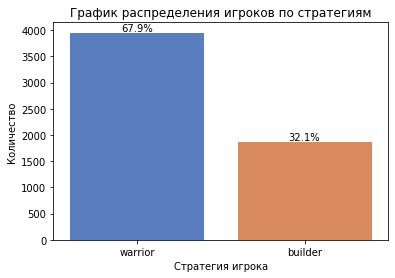

In [73]:
ax = sns.countplot(x="strategy", data=strategy_dict)

total = strategy_dict['user_id'].nunique()
for p in ax.patches:
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
    
ax.set_title('График распределения игроков по стратегиям')
ax.set_xlabel('Стратегия игрока')
ax.set_ylabel('Количество');

В результате, мы получили следующее разделение по стратегиям:
1. Строители `builder` - 32.1% - 1866 игроков
2. Войны `warrior`  - 67.9% - 3951 игроков

### 7.8 Retention Rate по стратегиям

Посчитаем retetion rate для войнов:

In [74]:
retention_war = ga_strategy.query('strategy == "warrior"').groupby('week')['user_id'].nunique().reset_index()
retention_war.columns = ['week', 'n_users']
retention_war['retention'] = retention_war['n_users'] / ga_strategy.query('strategy == "warrior"')['user_id'].nunique()
retention_war

,week,n_users,retention
0,19,3951,1.000000
1,20,3696,0.935459
2,21,1330,0.336624
3,22,168,0.042521
4,23,13,0.003290


Посчитаем retetion rate для строителей:

In [75]:
retention_bld = ga_strategy.query('strategy == "builder"').groupby('week')['user_id'].nunique().reset_index()
retention_bld.columns = ['week', 'n_users']
retention_bld['retention'] = retention_bld['n_users'] / ga_strategy.query('strategy == "builder"')['user_id'].nunique()
retention_bld

,week,n_users,retention
0,19,1866,1.000000
1,20,1863,0.998392
2,21,982,0.526259
3,22,129,0.069132
4,23,10,0.005359


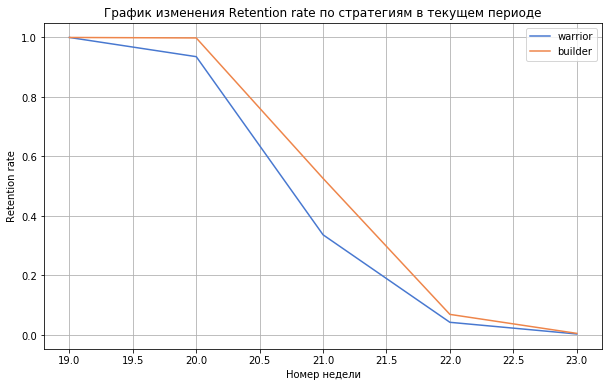

In [76]:
# Построим график изменения Retention rate по стратегиям в текущем периоде
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=retention_war, x = 'week', y = 'retention', label = 'warrior')
sns.lineplot(data=retention_bld, x = 'week', y = 'retention', label = 'builder')
ax.grid()
plt.title('График изменения Retention rate по стратегиям в текущем периоде')
plt.xlabel('Номер недели')
plt.ylabel('Retention rate')
plt.legend();

Кривая графика RR для войнов лежит ниже кривой строителей. Это может означать:
1. Войнам быстрее удается окончить уровень и им незачем больше возвращаться
2. Строители в течение первой недели не уменьшили число игроков, видимо постройки зданий очень увлекательны.

### 7.9 Среднее время прохождения уровня по стратегиям

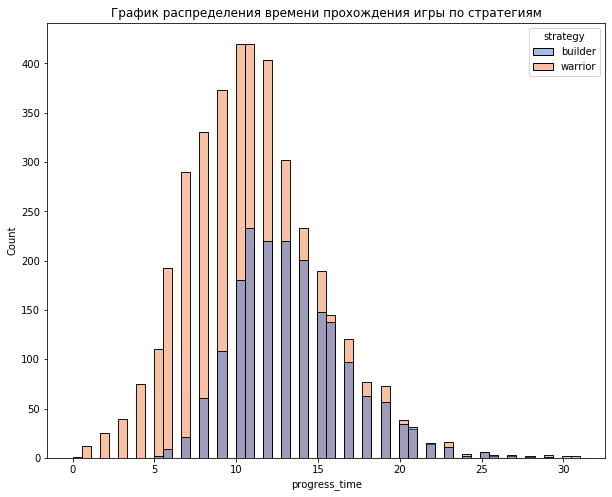

In [77]:
# Построим гистограмму распределений времени прхождения игры

fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(ga_strategy.query('event =="finished_stage_1"'), x="progress_time", hue = 'strategy')
plt.title('График распределения времени прохождения игры по стратегиям');

In [78]:
ga_strategy.query('event =="finished_stage_1" and strategy == "warrior"')['progress_time'].describe()

count    3951.000000
mean       11.058466
std         4.104875
min         0.000000
25%         8.000000
50%        11.000000
75%        13.000000
max        31.000000
Name: progress_time, dtype: float64

In [79]:
ga_strategy.query('event =="finished_stage_1" and strategy == "builder"')['progress_time'].describe()

count    1866.000000
mean       13.396570
std         3.522622
min         5.000000
25%        11.000000
50%        13.000000
75%        15.000000
max        29.000000
Name: progress_time, dtype: float64

Среднее время прохождения уровня по стратегиям:
Гистограмма войнов сдвинута влево относительно строителей, это значит, что строители проходят уровень медленнее на 2.5 дня.

1. Строители `builder`:
- Среднее время прохождения игры 13.5 дней, большая часть пользователей проходит игру от 11 до 15 дней.

2. Войны `warrior`:
- Среднее время прохождения игры 11 дней, большая часть пользователей проходит игру от 8 до 13 дней.

## 8. Маркетинг<a id="step8"></a>

### 8.1 Распределение затрат

С 3го по 9 мая у нас есть датасет с затратами на рекламу.

In [80]:
ad_cost

,source,day,cost
0,facebook_ads,2020-05-03,935.88
1,facebook_ads,2020-05-04,548.35
2,facebook_ads,2020-05-05,260.19
3,facebook_ads,2020-05-06,177.98
4,facebook_ads,2020-05-07,111.77
5,facebook_ads,2020-05-08,68.01
6,facebook_ads,2020-05-09,38.72
7,instagram_new_adverts,2020-05-03,943.20
8,instagram_new_adverts,2020-05-04,502.93
9,instagram_new_adverts,2020-05-05,313.97


Всего потратили на рекламу:

In [81]:
ad_cost['cost'].sum()

7603.57

Всего потрачено на рекламу 7603.57 единиц

Всего потратили по источникам:

In [82]:
ad_cost_pct = ad_cost.groupby('source')['cost'].sum().reset_index()
ad_cost_pct['pct'] = ad_cost_pct['cost'] / ad_cost_pct['cost'].sum()*100
ad_cost_pct.sort_values('cost', ascending=False)

,source,cost,pct
2,yandex_direct,2233.11,29.369231
1,instagram_new_adverts,2161.45,28.426778
0,facebook_ads,2140.90,28.156511
3,youtube_channel_reklama,1068.11,14.047480


На Яндекс, Инстаграм и Фейсбук бюджет примерно одинаковый 2200 единиц, на Ютуб потрачено в 2 раза меньше 1068 единиц

In [83]:
cost_by_day = ad_cost.groupby('day')['cost'].sum().reset_index()
cost_by_day

,day,cost
0,2020-05-03,3302.44
1,2020-05-04,1865.00
2,2020-05-05,1029.43
3,2020-05-06,620.48
4,2020-05-07,391.86
5,2020-05-08,242.77
6,2020-05-09,151.59


Cуммы потраченные на рекламу, уменьшались с 3302 в первый день до 151 единицы в последний.

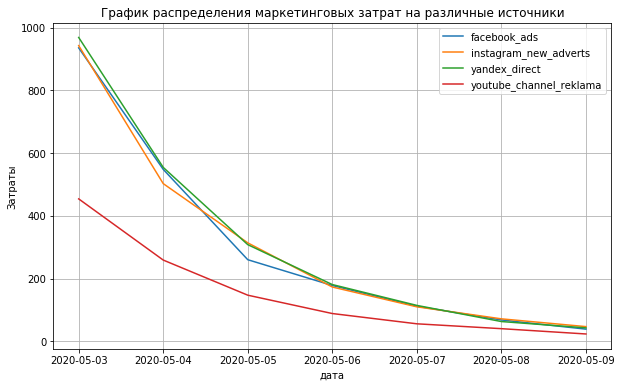

In [84]:
#Построим график распрделения маркетинговых затрат на различные источники
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=ad_cost, x = 'day', y = 'cost', hue='source', palette="tab10")
ax.grid()
plt.title('График распределения маркетинговых затрат на различные источники')
plt.xlabel('дата')
plt.ylabel('Затраты')
plt.legend();

** **
С 3го по 9 мая у нас есть датасет с затратами на рекламу. Всего потрачено на рекламу 7603.57 единиц. На Яндекс, Инстаграм и Фейсбук бюджет примерно одинаковый 2200 единиц, на Ютуб потрачено в 2 раза меньше 1068 единиц.
Cуммы потраченные на рекламу, уменьшались с 3302 в первый день до 151 единицы в последний.


### 8.2 CAC. Стоимость привлечения одного покупателя

In [85]:
#посчитаем 'cac' как затраты на рекламу поделенные на размеры когорт по дню

In [86]:
ga

,event_datetime,event,building_type,user_id,project_type,date,week,begin_of_week,first_visit_date,progress_time
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,19,2020-05-04,2020-05-04,0 days
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,2020-05-04,2020-05-04,1 days
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,2020-05-04,2020-05-04,1 days
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,2020-05-04,2020-05-04,1 days
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,19,2020-05-04,2020-05-04,2 days
...,...,...,...,...,...,...,...,...,...,...
135634,2020-05-13 23:56:39,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,2020-05-13,20,2020-05-11,2020-05-10,3 days
135635,2020-05-18 00:23:28,building,spaceport,cafd1b8b-507b-49ae-abf0-89fe863a8b03,NaN,2020-05-18,21,2020-05-18,2020-05-10,8 days
135636,2020-05-10 23:59:52,building,assembly_shop,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,2020-05-10,19,2020-05-04,2020-05-10,0 days
135637,2020-05-13 08:11:19,building,spaceport,bdc53e19-462a-4dc3-8b55-b4a34278af6a,NaN,2020-05-13,20,2020-05-11,2020-05-10,3 days


In [87]:
cac = ga.groupby('first_visit_date', ).agg({'user_id': ['count','nunique']}).reset_index()
cac.columns = ['first_visit_date', 'n_event', 'n_users']
cac

,first_visit_date,n_event,n_users
0,2020-05-04,64226,5860
1,2020-05-05,34756,3361
2,2020-05-06,17399,1847
3,2020-05-07,9429,1109
4,2020-05-08,5121,688
5,2020-05-09,3025,440
6,2020-05-10,1683,271


In [88]:
#соединим два датасета cac и cost_by_day методом combine_first,который поможет нам исключить сдвиг по затратам.
cac = cac.combine_first(cost_by_day)[['first_visit_date','n_event','n_users', 'cost']]
cac

,first_visit_date,n_event,n_users,cost
0,2020-05-04,64226,5860,3302.44
1,2020-05-05,34756,3361,1865.00
2,2020-05-06,17399,1847,1029.43
3,2020-05-07,9429,1109,620.48
4,2020-05-08,5121,688,391.86
5,2020-05-09,3025,440,242.77
6,2020-05-10,1683,271,151.59


In [89]:
# посчитаем сас
cac['cac'] = cac['cost'] / cac['n_users']
cac

,first_visit_date,n_event,n_users,cost,cac
0,2020-05-04,64226,5860,3302.44,0.563556
1,2020-05-05,34756,3361,1865.00,0.554894
2,2020-05-06,17399,1847,1029.43,0.557352
3,2020-05-07,9429,1109,620.48,0.559495
4,2020-05-08,5121,688,391.86,0.569564
5,2020-05-09,3025,440,242.77,0.551750
6,2020-05-10,1683,271,151.59,0.559373


In [90]:
cac['cac'].mean()

0.5594264059876343

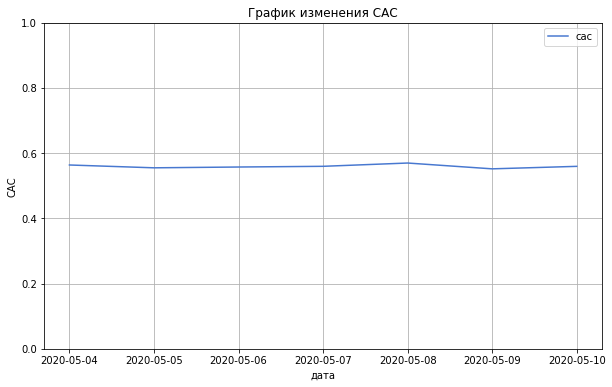

In [91]:
#построим график изменения cac
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=cac, x = 'first_visit_date', y = 'cac', label = 'cac')
ax.grid()
plt.title('График изменения САС')
plt.xlabel('дата')
plt.ylabel('CAC')
plt.ylim(0, 1);

Средний САС 0.56 единиц и не меняется во времени.

### 8.3 CAC c разбивкой по источникам.

In [92]:
#соединим таблицы ga c sources, по столбцу user_id
ga = ga.merge(sources, on='user_id')

In [93]:
cac_source = ga.groupby(['first_visit_date', 'source'])['user_id'].nunique().reset_index()
cac_source

,first_visit_date,source,user_id
0,2020-05-04,facebook_ads,1184
1,2020-05-04,instagram_new_adverts,1452
2,2020-05-04,yandex_direct,2078
3,2020-05-04,youtube_channel_reklama,1146
4,2020-05-05,facebook_ads,694
5,2020-05-05,instagram_new_adverts,796
6,2020-05-05,yandex_direct,1208
7,2020-05-05,youtube_channel_reklama,663
8,2020-05-06,facebook_ads,345
9,2020-05-06,instagram_new_adverts,472


In [94]:
#Так как в столце с рекламным бюджетом даны сдвинуты на день раньше, создадим столбец с датами совпадающими с днем событий
ad_cost['day_1'] = ad_cost['day'] + pd.to_timedelta('1 day')
ad_cost['day_1'] = ad_cost['day_1'].dt.date

In [95]:
#соединим 2 датасета
cac_source = cac_source.merge(ad_cost, left_on=  ['first_visit_date', 'source'],
                   right_on= ['day_1', 'source'])

In [96]:
# и найдем средний cac по источникам
cac_source['cac'] = cac_source['cost'] / cac_source['user_id']
cac_source.groupby('source')['cac'].mean().reset_index()

,source,cac
0,facebook_ads,0.776353
1,instagram_new_adverts,0.646158
2,yandex_direct,0.463491
3,youtube_channel_reklama,0.403216


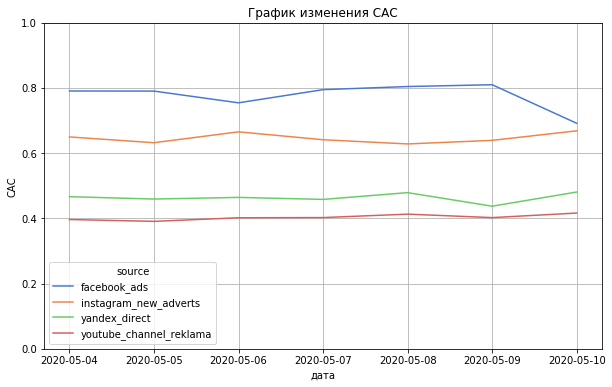

In [97]:
#построим график изменения cac  по источникам
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=cac_source, x = 'first_visit_date', y = 'cac', hue = 'source')
ax.grid()
plt.title('График изменения САС')
plt.xlabel('дата')
plt.ylabel('CAC')
plt.ylim(0, 1);

Самые дорогие игроки приходят с Фейсбука, а самые дешевые с Ютуба:

Стоимость привлечения пользователя:
1. facebook_ads - 0.776353
2. instagram_new_adverts - 0.646158
3. yandex_direct - 0.463491
4. youtube_channel_reklama - 0.403216

## 9. Формулировка и проверка статистических гипотез<a id="step9"></a>

### 9.1 Гипотеза №1
   - **H0:**  Время прохождения уровня пользователями - строителями равно времени прохождения уровня пользователями - войнами.
   - **H1:**  Время прохождения уровня пользователями - строителями не равно времени прохождения уровня пользователями - войнами.

Пороговое значение alpha = 0.05

Посчитаем дисперсии выборок:

In [98]:
var_builder = np.var(ga_strategy.query('event =="finished_stage_1" and strategy =="builder"')['progress_time'])
var_builder

12.402217604128253

In [99]:
var_warrior = np.var(ga_strategy.query('event =="finished_stage_1" and strategy =="warrior"')['progress_time'])
var_warrior

16.845733815550286

Построим распределения наших выбор, чтобы посмотреть их "нормальность":

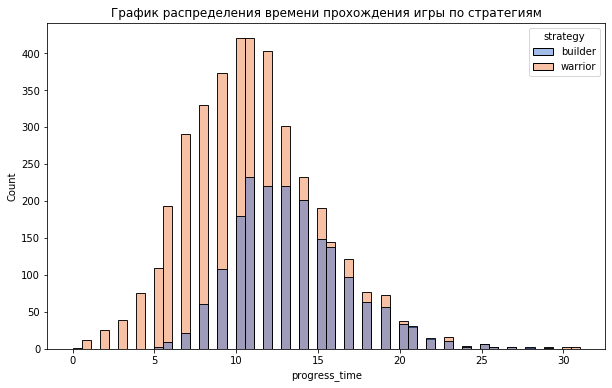

In [100]:
# Построим гистограмму распределений времени прхождения игры

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(ga_strategy.query('event =="finished_stage_1"'), x="progress_time", hue = 'strategy')
plt.title('График распределения времени прохождения игры по стратегиям');

Распределение нормальное, наблюдений много (5817), можем проводить t-тест.

In [101]:
alpha = .05

results = st.ttest_ind(
    ga_strategy.query('event =="finished_stage_1" and strategy =="builder"')['progress_time'], 
    ga_strategy.query('event =="finished_stage_1" and strategy =="warrior"')['progress_time'],
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 6.5704667556436364e-105
Отвергаем нулевую гипотезу


Значит мы можем отвергнуть нулевую гипотезу:

**H1:** Время прохождения уровня пользователями - строителями не равно времени прохождения уровня пользователями - войнами.

###  9.2 Гипотеза №2
   - **H0:**  Среднее кол-во построек, построенных пользователями - строителями равно среднему кол-ву построек, построенных пользователями - войнами
   - **H1:**  Среднее кол-во построек, построенных пользователями - строителями не равно среднему кол-ву построек, построенных пользователями - войнами

In [102]:
building_count = ga_strategy.groupby(
    ['user_id', 'strategy'])['building_type'].count().reset_index()
building_count.columns = ['user_id', 'strategy', 'n_building']
building_count.sort_values('n_building', ascending=True)

,user_id,strategy,n_building
2908,7ef7fc89-2779-46ea-b328-9e5035b83af5,warrior,2
3159,8a782485-46be-432d-8413-9777a586df52,warrior,2
662,1ad1ac21-97dc-4d9a-ad33-a044fb453d36,warrior,2
5477,f0b68360-017b-43ed-ac1f-31c4481331e4,warrior,2
3094,875e414a-d8a8-4041-93c0-7ab12b9cd328,warrior,2
...,...,...,...
3373,94844e06-0352-4048-9e62-1db7718f804c,builder,19
5684,fa36cf08-cda1-4ee3-bee9-be16ded7071e,builder,19
5809,ff841992-d93b-462e-bc6e-18c24a514f36,builder,20
4853,d6aca06a-cd75-4cd8-b8cd-240a3c163884,builder,20


In [103]:
 building_count.query('strategy == "builder"')['n_building'].mean()

12.64790996784566

In [104]:
 building_count.query('strategy == "warrior"')['n_building'].mean()

9.411541381928625

Среднее количество построек у строителя 12.6, тогда как у война 9.5.

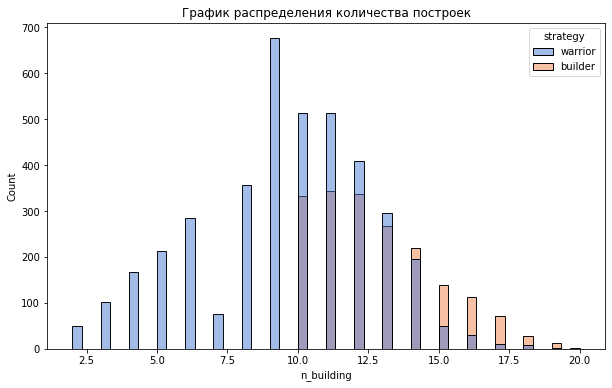

In [105]:
# Построим гистограмму распределений количества построек

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(building_count, x="n_building", hue = 'strategy')
plt.title('График распределения количества построек');

Количество построек у войнов колеблется от 2 до 20, тогда как у строителей минимальное количество построек 20.

Распределение нормальное, наблюдений много (5817), можем проводить t-тест.

Пороговое значение alpha = 0.05
Посчитаем дисперсии выборок:

In [106]:
var_builder = np.var(building_count.query('strategy == "builder"')['n_building'])
var_builder

4.673996167671274

In [107]:
var_warrior = np.var(building_count.query('strategy == "warrior"')['n_building'])
var_warrior

9.35834819361783

In [108]:
alpha = .05

results = st.ttest_ind(
    building_count.query('strategy == "builder"')['n_building'], 
    building_count.query('strategy == "warrior"')['n_building'],
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.0
Отвергаем нулевую гипотезу


Значит мы можем отвергнуть нулевую гипотезу:

   - **H1:**  Среднее кол-во построек, построенных пользователями - строителями не равно среднему кол-ву построек, построенных пользователями - войнами

** **
Из проверки наших гипотез мы можем сделать следующие заключения:
1. Строителям требуется больше времени, на то чтобы построить их большее количество построек и завершить уровень.
2. Войнам же наоборот нужно меньше времени, и усилий, для того, чтобы завершить уровень.

## 10. Общий вывод<a id="step10"></a>

**Загрузка данных**

Датасет game_actions
- размер (135640 строк, 5 столбца)
- неправильный тип у столбца с датами
- есть 1 дубликат
- есть пропуски в столбцах building_type, project_type. Пропуски не похожи на случайные

Датасет ad_cost:
- размер (28 строк, 3 столбца)
- неправильный тип у столбца с датами
- дубликатов нет
- столбец cost стоит округлить до двух знаков после запятой     
- 4  уникальных источника рекламы

Датасет sources:
- размер (13576 строк, 2 столбца)
- дубликатов нет
- пропусков нет

**Предобработка данных**

`game_actions`
- столбец `event_datetime` приведен к типу datetime
- дубликаты удалены
- В столбце `building_type` мы видим только 127956 строк, ровно столько сколько событий building у нас есть в столбце `event`, ситуация со столбцом `project_type` аналогична, в него вынесено событие `project` и указан его тип `satellite_orbital_assembly` разработка орбитальной сборки спутников. Оставили пропуски как есть, не заполняя.
- данные за период с 4 мая по 5 июня 2020 года


`ad_cost`
- столбец `day` приведен к типу datetime
- столбец `cost` округлен до двух знаков
- данные по стоимостям кликов за период с 3 мая по 9 мая, то есть стоимость привлечения нашей когорты

**Анализ влияния событий на совершение целевого события**

Количество событий

Согласно графику и расчетам всего у нас 135639 событий, из них
- 94.3% - постройка зданий
- 4.3 % - завершение 1-го уровня
- 1.4% - выполнение проекта
 
Всего в игре из первой когорты 13576 уникальных пользоватей, которые совершают эти события, из них:
- 100% строят постройки
- 42.8% завершили 1-й уровень
- 13.7% выполнили проект
 
Количество построек

Всего у нас есть 127956 построек, из которых:
- 42.6% (54494 постройки) -`assembly_shop` — сборочный цех, и его построили 100% наших пользователей
- 46.4% (59325 построек)- `spaceport` — космопорт, и его построили 98% пользователей
- 11% (14137 построек)- `research_center` — исследовательский центр, построено 56% пользователей

В среднем на одного уникального пользователя приходится по 9.5 построек, но завершить проект или пройти первый уровень, игрок может только 1 раз.

**Продуктовый анализ**

**DAU** В среднем в игру играют 2884 пользователей в день. Наибольшая активность 4-10 мая, после 25 активность правктически сводится к нулю.
Пик активности 10 мая (9219 уникальных пользователей), после этого показатели начинают падать. Это совпадает с датами проведения маркетинговой компании 3-9 мая.

**DAU пользователей по совершенным событиям.** можно отметить что до 15 мая показатели по завершенным уровням растут, после начинают падать. То есть в среднем на завершение уровня у пользователя уходит 10-14 дней

**WAU** Средний WAU 6120 пользователей в неделю. Причем мы видим высокие показатели первые две недели и потом резкий обвал после окончания рекламной компании по привлечению людей. К концу месяца пользователей из нашей когорты практически не осталось.

**WAU пользователей по совершенным событиям.** Первые 10 дней рост по заврешению уровня и проекту, потом уменьшение. к 25 мая практически все пользователи или завршили уровень или покинули игру.

**Sticky factor (степень лояльности и вовлеченности аудитории)**

47% всех посетителей из нашей когорты остаются лояльны к сервису целую неделю.

**Количество событий в день**

В среднем один пользователь совершаает 1.3 события в день. То есть, чтобы пройти первый уровень пользователю требудется примерно 13-18 событий.

**Retention rate**

По графику Retention rate видно, что:
1. после двух недель игры, в когорте остается меньше 32% пользователей
2. к четвертой неделе остается меньше 4% игроков

Это может быть потому, что в первые две недели большее количество игроков завершает первый уровень. Оставшаяся часть или теряет интерес, или неспешно завершает уровень.

**Среднее время прохождения игры**

Среднее время прохождения игры 12 дней, основная масса пользователей проходит игру от 9 до 14 дней.

**Определение стратегий игры**

В игре есть две возможности для прохождения уровня:

1. Победа над первым врагом
2. Реализация проекта - разработка орбитальной сборки спутников

Мы получили следующее разделение по стратегиям:
- Строители builder - 32.1% - 1866 игроков
- Войны warrior - 67.9% - 3951 игроков

**Retention Rate по стратегиям**

Строители builder:
- 1-ая неделя - 100% игроков\
- 2-ая неделя - 99.8% игроков
- 3-я недля - 52% игроков
- 4-я неделя - 7% игроков

Войны warrior
- 1-ая неделя - 100% игроков\
- 2-ая неделя - 93% игроков
- 3-я недля - 34% игроков
- 4-я неделя -4% игроков

Кривая графика RR для войнов лежит ниже кривой строителей. Это может означать, что войнам быстрее удается окончить уровень и им незачем больше возвращаться.

**Среднее время прохождения уровня по стратегиям:**

Гистограмма войнов сдвинута влево относительно строителей, это значит, что строители проходят уровень медленнее на 2.5 дня.

Строители `builder`:
1. Среднее время прохождения игры 13.5 дней, большая часть пользователей проходит игру от 11 до 15 дней.
Войны `warrior`:
2. Среднее время прохождения игры 11 дней, большая часть пользователей проходит игру от 8 до 13 дней.

**Маркетинг**

**Распределение затрат**

С 3го по 9 мая у нас есть датасет с затратами на рекламу. Всего потрачено на рекламу 7603.57 единиц. На Яндекс, Инстаграм и Фейсбук бюджет примерно одинаковый 2200 единиц, на Ютуб потрачено в 2 раза меньше 1068 единиц. Cуммы потраченные на рекламу, уменьшались с 3302 в первый день до 151 единицы в последний.

**CAC. Стоимость привлечения одного покупателя.**

Средний САС 0.56 единиц и не меняется во времени.

**CAC c разбивкой по источникам.**

Самые дорогие игроки приходят с Фейсбука, а самые дешевые с Ютуба:

Стоимость привлечения пользователя:
- facebook_ads - 0.776353
- instagram_new_adverts - 0.646158
- yandex_direct - 0.463491
- youtube_channel_reklama - 0.403216

**Формулировка и проверка статистических гипотез**
 
 **Гипотеза №1:**
 
Время прохождения уровня пользователями - строителями и время прохождения уровня пользователями - войнами одинаковое.
Проведя T-тест, мы сделали вывод о том, что мы можем отвергнуть нулевую гипотезу:

**Время прохождения уровня пользователями - строителями не равно времени прохождения уровня пользователями - войнами.**

 **Гипотеза №2:**

Среднее кол-во построек, построенных пользователями - строителями и пользователями - войнами одинкаковое.
Проведя T-тест, мы сделали вывод о том, что мы можем отвергнуть нулевую гипотезу:

**H1: Среднее кол-во построек, построенных пользователями - строителями не равно среднему кол-ву построек, построенных пользователями - войнами**
 
Из проверки наших гипотез мы можем сделать следующие заключения:
1. Строителям требуется больше времени, на то чтобы построить их большее количество построек и завершить уровень.
2. Войнам же наоборот нужно меньше времени, и усилий, для того, чтобы завершить уровень.

## 11. Рекомендации<a id="step11"></a>

Нашей задачей в данном проекте было определить время запуска рекламы, путем показа ее на экране выбора постройки.

1. Так как нам необходимо ориентироваться на то, чтобы показать рекламу большему количеству пользователей в течение большего время, стоит ориентрироваться на время прохождения игры у войнов, которое составляет от 8 до 13 дней.Причем есть те кто проодят игру и за 2 дня. 3-4 дня после начала игры отптимальный срок для начала показа рекламы.
2. Количество построек, которое строят игроки в среднем около 10 единиц, стоит разнообразить количество построек, для того чтобы пользователям было интереснее играть.
3. Так как самая оптимальная стоимость привлечения покупателя в yandex_direct и youtube_channel_reklama, чтоит расширить бюджеты на рекламу именно на этих сервисах.